In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [137]:
data = pd.read_csv('Social_Network_Ads (2).csv')

In [138]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [139]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [140]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


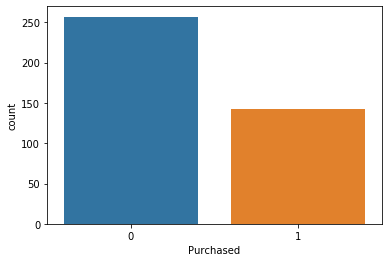

In [142]:
sns.countplot(data['Purchased'])
plt.show()

In [143]:
df =  pd.get_dummies(data['Gender'],drop_first=True)

In [145]:
dataframe = pd.concat([data,df],axis=1)

In [146]:
dataframe.drop(columns='Gender',inplace=True)

In [147]:
dataframe.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [148]:
x = dataframe.drop(columns=['User ID','Purchased'])
y = dataframe['Purchased']

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [150]:
x_train.shape,x_test.shape

((320, 3), (80, 3))

In [151]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test  = scaler.transform(x_test)

In [152]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.9


In [153]:
y_pred = classifier.predict(X_test)

In [154]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[46,  5],
       [ 3, 26]], dtype=int64)

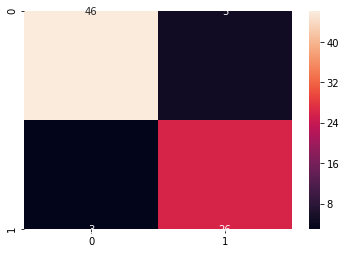

In [155]:
sns.heatmap(mat,annot=True)
plt.show()

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



### Optimal K value finding.

In [157]:
k_range = range(1,50)
score = []

for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
np.array(score).max()

0.9125

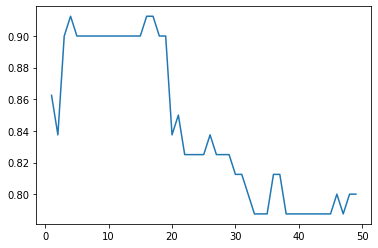

In [158]:
plt.plot(k_range,score)
plt.show()

In [201]:
score = []
k_neibour = list(range(1,50,2))
for i in k_neibour:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    y_predict = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_predict))

In [208]:
np.array(score).max()

0.9125

## Generating the model k=3

In [209]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.predict(X_test)
y_predict = knn.predict(X_test)
print('Accuarcy score :-',accuracy_score(y_test,y_predict))

Accuarcy score :- 0.9


## Generating the model k=8

In [210]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn.predict(X_test)
y_predict = knn.predict(X_test)
print('Accuarcy score :-',accuracy_score(y_test,y_predict))

Accuarcy score :- 0.9


From the above we can see the as we increase the k value our accuracy getting increase.

#### Here,we have increased the number of neighbours in the model and accuracy got increased.But,this is not necessary for each case that an increase in many neighbours increases the accuracy. 

- The training phase of the k-nearest neighbor classification algorithms.There is no need to the train the model for generalization.
- That is why KNN is known as the simple and instance-based learning algorithm.KNN can useful in the case of non-linear data.
- It can be used with the Regression problem.Output value for object is computed by the average of k closest neighbors value.

The testing phase of k-nearest neighbors classification is slower and costlier in the term of time and memory.
It requires large memory for storing the entire training dataset for prediction.KNN requires scalling of the data because KNN uses the Euclidean distance between two data points to find the nearest neighbors.
Euclidean distance is sensitive to magnitudes.The features with high magnitudes will weight more the features than the features with low magnitudes.
KNN is also not suitable for large dimensional data.

#### To improve the KNN model accuracy we need Standardscaling while Classification and Regression.

## Parameter tunning with Cross-Validation.

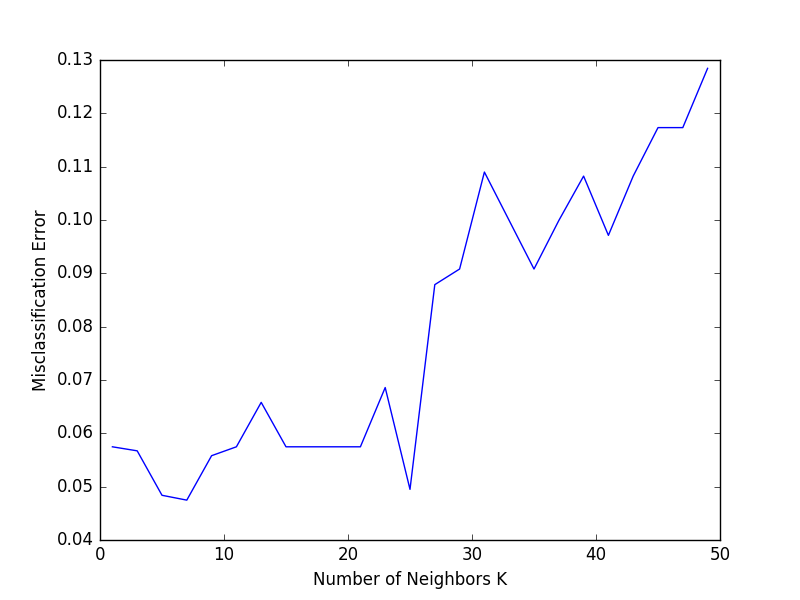

In [211]:
from IPython.display import Image
Image(filename='C:/Users/Microsoft/Desktop/pandas/cv_knn.png')

##### Parameter tunning with Cross-Validation.

It will help to get the best value of nearest neighbour (K)

- During this method, as we will increase the number of neighbours (k) That we should have to take care of the errors.

So,need to select such value of K at which we will **optimum error.**

The best K is the one that corresponds to the lowest test error rate,so let's suppose we carry out the repeated measurements of the test error for the diffrent values of K.

Inadvertently,what we are doing is using the test set as a training set!.This means that we are underestimating the true error rate since our model has been force to fit test set in best possible manner.
Our model is then incapable in generalizing to newer observations,a process known as overfitting.

Hence,touching the test set is out of the question and must only be done at the very end of our pipeline.

### Using the test set for hyperparameter tunning can lead to overfitting.

- An alternative and smarter apporoach involves estinating the test error by holding out a subset of the training set from the fitting process.
- This subset called as validation set,can be used to select the appropriate level of flexibility of our algorithm!.
- There are the diffrent validation approaches that are used in practice,and we will be exploring one of the more popular once called as **k-fold cross validation.**

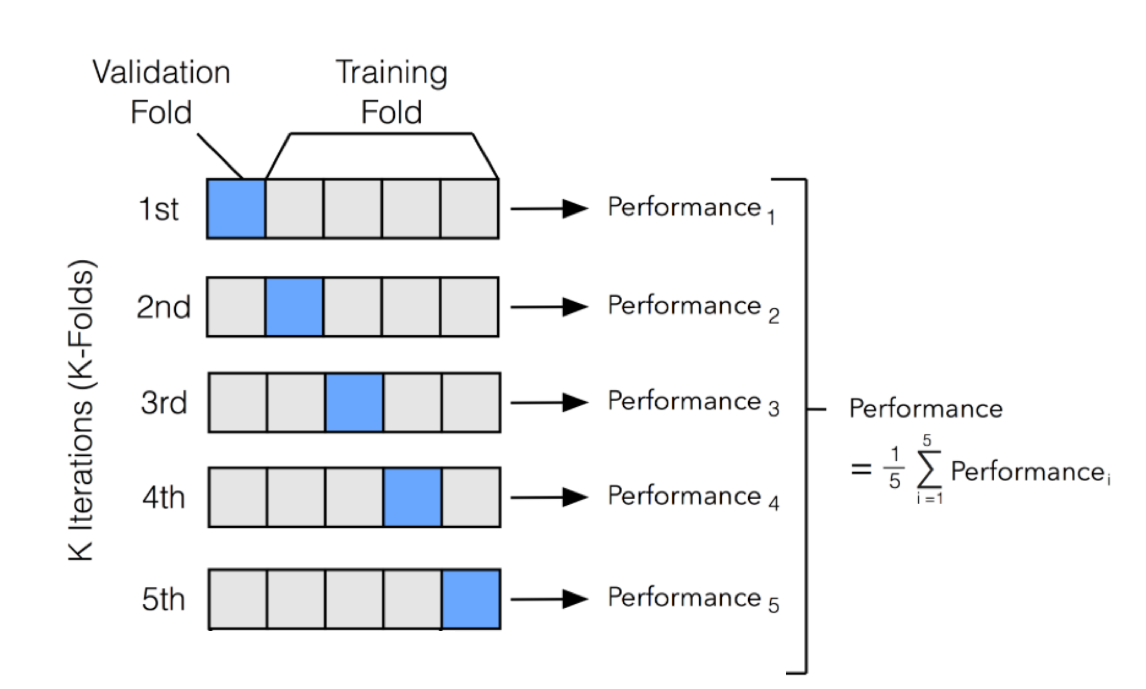

In [212]:
from IPython.display import Image
Image(filename='C:/Users/Microsoft/Desktop/pandas/kfolds.png')

#### Explination with Working Principle :-

- We our data into the many sunsets.we take one subset for validation and rest of the sunsets used as training data.
- Let's supose we having the cv=10 
- If we have ten cross validation then devide the data into then ten similar parts and we take one part for validations and other 9 part for taken as training datasets.
- For the 2nd time we will take the 2nd subset for cross-validation and rest of the 9 subset taken as training datasets.
- Simailary it goes upto 10 times.then we will calculate mean accuracy and other accuracy metrics to found out the performance of our model.

#### Cross validation can be used to estimate the test error associated with a learning method in order to evaluate it's performance  or to select the appropriate level of flexibility.  

In [213]:
scaler = StandardScaler()
x_scalled =scaler.fit_transform(x)

In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
neibours = list(range(1,50,2))
cv_score =[]

for k in neibours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_scalled,y,cv=10,scoring='accuracy')
    cv_score.append(scores.mean())

In [183]:
cv_score

[0.8575000000000002,
 0.8975,
 0.9075,
 0.905,
 0.905,
 0.9099999999999999,
 0.905,
 0.8925000000000001,
 0.8825000000000001,
 0.8775000000000001,
 0.8800000000000001,
 0.875,
 0.8700000000000001,
 0.86,
 0.8550000000000001,
 0.85,
 0.845,
 0.8424999999999999,
 0.845,
 0.8375,
 0.8275,
 0.8299999999999998,
 0.8175000000000001,
 0.8174999999999999,
 0.8125]

#### Now we want to calculate the RMS(Root Mean Square) for each CV Score.

- This is nothing but the 1-[cv_scores.]

In [184]:
MSE = [1-x for x in cv_score]

In [185]:
MSE

[0.14249999999999985,
 0.10250000000000004,
 0.09250000000000003,
 0.09499999999999997,
 0.09499999999999997,
 0.09000000000000008,
 0.09499999999999997,
 0.10749999999999993,
 0.11749999999999994,
 0.12249999999999994,
 0.11999999999999988,
 0.125,
 0.1299999999999999,
 0.14,
 0.1449999999999999,
 0.15000000000000002,
 0.15500000000000003,
 0.15750000000000008,
 0.15500000000000003,
 0.16249999999999998,
 0.1725,
 0.17000000000000015,
 0.18249999999999988,
 0.1825000000000001,
 0.1875]

In [186]:
optimal_k = neibours[(MSE.index(min(MSE)))]

In [187]:
optimal_k

11

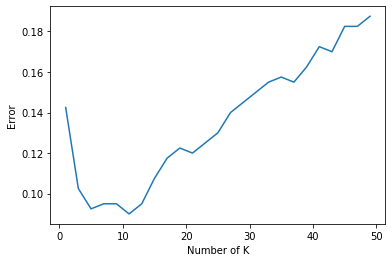

In [188]:
plt.plot(neibours,MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()

In [189]:
scaler = StandardScaler()
x_scalled =scaler.fit_transform(x)

In [225]:
n = list(range(1,50))
cv_sc = []

for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    sco = cross_val_score(knn,x_scalled,y,cv=10,scoring='accuracy')
    cv_sc.append(sco.mean())

In [226]:
cv_sc

[0.8575000000000002,
 0.845,
 0.8975,
 0.8899999999999999,
 0.9075,
 0.9024999999999999,
 0.905,
 0.8999999999999998,
 0.905,
 0.9099999999999999,
 0.9099999999999999,
 0.9075,
 0.905,
 0.8925000000000001,
 0.8925000000000001,
 0.8825000000000001,
 0.8825000000000001,
 0.8800000000000001,
 0.8775000000000001,
 0.8800000000000001,
 0.8800000000000001,
 0.8700000000000001,
 0.875,
 0.8700000000000001,
 0.8700000000000001,
 0.8625,
 0.86,
 0.8575000000000002,
 0.8550000000000001,
 0.85,
 0.85,
 0.8400000000000001,
 0.845,
 0.845,
 0.8424999999999999,
 0.8424999999999999,
 0.845,
 0.835,
 0.8375,
 0.8274999999999999,
 0.8275,
 0.8299999999999998,
 0.8299999999999998,
 0.8125,
 0.8175000000000001,
 0.82,
 0.8174999999999999,
 0.8150000000000001,
 0.8125]

In [236]:
MSE1 = [1-x for x in cv_sc]

In [237]:
MSE1

[0.14249999999999985,
 0.15500000000000003,
 0.10250000000000004,
 0.1100000000000001,
 0.09250000000000003,
 0.09750000000000014,
 0.09499999999999997,
 0.1000000000000002,
 0.09499999999999997,
 0.09000000000000008,
 0.09000000000000008,
 0.09250000000000003,
 0.09499999999999997,
 0.10749999999999993,
 0.10749999999999993,
 0.11749999999999994,
 0.11749999999999994,
 0.11999999999999988,
 0.12249999999999994,
 0.11999999999999988,
 0.11999999999999988,
 0.1299999999999999,
 0.125,
 0.1299999999999999,
 0.1299999999999999,
 0.13749999999999996,
 0.14,
 0.14249999999999985,
 0.1449999999999999,
 0.15000000000000002,
 0.15000000000000002,
 0.15999999999999992,
 0.15500000000000003,
 0.15500000000000003,
 0.15750000000000008,
 0.15750000000000008,
 0.15500000000000003,
 0.16500000000000004,
 0.16249999999999998,
 0.1725000000000001,
 0.1725,
 0.17000000000000015,
 0.17000000000000015,
 0.1875,
 0.18249999999999988,
 0.18000000000000005,
 0.1825000000000001,
 0.18499999999999994,
 0.1875

In [238]:
optimalk = n[MSE1.index(np.array(MSE).min())]

In [239]:
optimalk

10

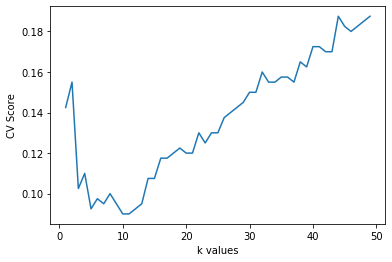

In [240]:
plt.plot(n,MSE1)
plt.xlabel('k values')
plt.ylabel('CV Score')
plt.show()

In [246]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_predi = knn.predict(X_test)
print('Accuarcy :',accuracy_score(y_test,y_predi))

Accuarcy : 0.9
